Dados SP: [https://www.saopaulo.sp.gov.br/planosp/simi/dados-abertos/](https://www.saopaulo.sp.gov.br/planosp/simi/dados-abertos/)

Dados RJ: [https://qsprod.saude.gov.br/extensions/DEMAS_C19Vacina/DEMAS_C19Vacina.html](https://qsprod.saude.gov.br/extensions/DEMAS_C19Vacina/DEMAS_C19Vacina.html)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import io
from PIL import Image
import folium
from folium import plugins
import json

In [2]:
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 994 kB 43.4 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 
     |████████████████████████████████| 6.3 MB 44.9 MB/s 


In [3]:
date = '2021-09-27'
date_new = date.replace('-','')

In [18]:
sp = pd.read_csv('https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/SP_info.csv')

In [19]:
sp.head()

,Unnamed: 0,Municipio,Codigo_IBGE,Populacao,Populacao_60+
0,0,Adamantina,3500105,33894,7398
1,1,Adolfo,3500204,3447,761
2,2,Aguaí,3500303,35608,5245
3,3,Águas da Prata,3500402,7797,1729
4,4,Águas de Lindóia,3500501,18374,3275


In [20]:
vacs = pd.read_csv(f'https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/{date_new}_vacinometro.csv', sep = ';')

Devido à acentuação o nome de alguns municípios no arquivo de informações do estado de São Paulo não batem com a forma escrita no arquivo de cobertura vacinal. Está célula abaixo padroniza na nomenclatura em ambos os arquivos para sincronizar as vacinas aplicadas com a população de cada município.

In [ ]:
for i in range(len(vacs)):
  municip = ''
  if vacs['Município'][i] == 'ARCO-ÍRIS':
    municip += 'Arco-Íris'
    vacs['Município'][i] = municip
  elif vacs['Município'][i] == 'EMBU-GUAÇU':
    municip += 'Embu-Guaçu'
    vacs['Município'][i] = municip
  elif vacs['Município'][i] == "ESTRELA D'OESTE":
    municip += "Estrela d'Oeste"
    vacs['Município'][i] = municip
  elif vacs['Município'][i] == "APARECIDA D'OESTE":
    municip += "Aparecida d'Oeste"
    vacs['Município'][i] = municip
  elif vacs['Município'][i] == "GUARANI D'OESTE":
    municip = "Guarani d'Oeste"
    vacs['Município'][i] = municip
  elif vacs['Município'][i] == "SANTA CLARA D'OESTE":
    municip = "Santa Clara d'Oeste"
    vacs['Município'][i] = municip
  elif vacs['Município'][i] == "PALMEIRA D'OESTE":
    municip = "Palmeira d'Oeste"
    vacs['Município'][i] = municip
  elif vacs['Município'][i] == "SANTA BÁRBARA D'OESTE":
    municip = "Santa Bárbara d'Oeste"
    vacs['Município'][i] = municip
  elif vacs['Município'][i] == "SÃO JOÃO DO PAU D'ALHO":
    municip = "São João do Pau d'Alho"
    vacs['Município'][i] = municip
  elif vacs['Município'][i] == "SANTA RITA D'OESTE":
    municip = "Santa Rita d'Oeste"
    vacs['Município'][i] = municip
  elif vacs['Município'][i] == "PARIQUERA-AÇU":
    municip = "Pariquera-Açu"
    vacs['Município'][i] = municip
  else:
    n = vacs['Município'][i].split(' ')
    for j in range(len(n)):
      if j < len(n)-1:
        if n[j] == 'DE' or n[j] == 'DO' or n[j] == 'DA' or n[j] == 'DOS' or n[j] == 'DAS':
          name = n[j].lower()
          municip += name + ' '
        else:
          name = n[j][1:].lower()
          municip += n[j][0] + name + ' '
      else:
        name = n[j][1:].lower()
        municip += n[j][0] + name
    vacs['Município'][i] = municip

In [22]:
vacs_1st = vacs.loc[vacs['Dose'] == '1° DOSE'].reset_index(drop=True)

In [23]:
vacs_2nd = vacs.loc[vacs['Dose'] == '2° DOSE'].reset_index(drop=True)
vacs_dose_unic = vacs.loc[vacs['Dose'] == 'UNICA'].reset_index(drop=True)

In [24]:
vacs_1st

,Município,Dose,Total Doses Aplicadas
0,Zacarias,1° DOSE,2106
1,Votuporanga,1° DOSE,79403
2,Votorantim,1° DOSE,84202
3,Vitória Brasil,1° DOSE,1523
4,Vista Alegre do Alto,1° DOSE,6358
...,...,...,...
640,Águas de Lindóia,1° DOSE,15945
641,Águas da Prata,1° DOSE,6508
642,Aguaí,1° DOSE,26429
643,Adolfo,1° DOSE,3638


In [25]:
doses_1 = []
doses_2 = {}
doses_2['Municipio'] = sp['Municipio']
doses_2['Doses'] = [0 for i in range(len(doses_2['Municipio']))]

for i in range(len(sp)):
  for j in range(len(vacs_1st)):
    if sp['Municipio'][i] == vacs_1st['Município'][j]:
      doses_1.append(vacs_1st['Total Doses Aplicadas'][j])

for i in range(len(doses_2['Municipio'])):
  for j in range(len(vacs_2nd)):
    if doses_2['Municipio'][i] == vacs_2nd['Município'][j]:
      doses_2['Doses'][i] += vacs_2nd['Total Doses Aplicadas'][j]
  for k in range(len(vacs_dose_unic)):
    if doses_2['Municipio'][i] == vacs_dose_unic['Município'][k]:
      doses_2['Doses'][i] += vacs_dose_unic['Total Doses Aplicadas'][k]

In [26]:
sp['Vacina_1_dose'] = doses_1
sp['Imunização_completa'] = doses_2['Doses']

In [27]:
sp['Cobertura vacina 1 dose'] = sp['Vacina_1_dose']/sp['Populacao']
sp['Cobertura vacina completa'] = sp['Imunização_completa']/sp['Populacao']

In [28]:
for i in range(len(sp)):
  if sp['Cobertura vacina 1 dose'][i] > 1:
    sp['Cobertura vacina 1 dose'][i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
sp.head()

,Unnamed: 0,Municipio,Codigo_IBGE,Populacao,Populacao_60+,Vacina_1_dose,Imunização_completa,Cobertura vacina 1 dose,Cobertura vacina completa
0,0,Adamantina,3500105,33894,7398,29292,21660,0.864224,0.639051
1,1,Adolfo,3500204,3447,761,3638,2892,1.000000,0.838990
2,2,Aguaí,3500303,35608,5245,26429,19681,0.742221,0.552713
3,3,Águas da Prata,3500402,7797,1729,6508,4823,0.834680,0.618571
4,4,Águas de Lindóia,3500501,18374,3275,15945,11917,0.867802,0.648580


In [30]:
sp.loc[sp['Cobertura vacina completa'] == max(sp['Cobertura vacina completa'])]

,Unnamed: 0,Municipio,Codigo_IBGE,Populacao,Populacao_60+,Vacina_1_dose,Imunização_completa,Cobertura vacina 1 dose,Cobertura vacina completa
6,6,Águas de São Pedro,3500600,3122,764,3375,2636,1.0,0.844331


In [31]:
sp.loc[sp['Municipio'] == 'São Paulo']

,Unnamed: 0,Municipio,Codigo_IBGE,Populacao,Populacao_60+,Vacina_1_dose,Imunização_completa,Cobertura vacina 1 dose,Cobertura vacina completa
562,562,São Paulo,3550308,11869660,1853286,10328601,7111441,0.870168,0.599128


In [ ]:
np.mean(sp['Cobertura vacina completa'])

0.5839839942285775

In [ ]:
np.median(sp['Cobertura vacina completa'])

0.5786163522012578

In [ ]:
np.std(sp['Cobertura vacina completa'])

0.07850162203766262

In [ ]:
np.percentile(sp['Cobertura vacina completa'], 2.5), np.percentile(sp['Cobertura vacina completa'], 97.5)

(0.4416581229691044, 0.7553117647058822)

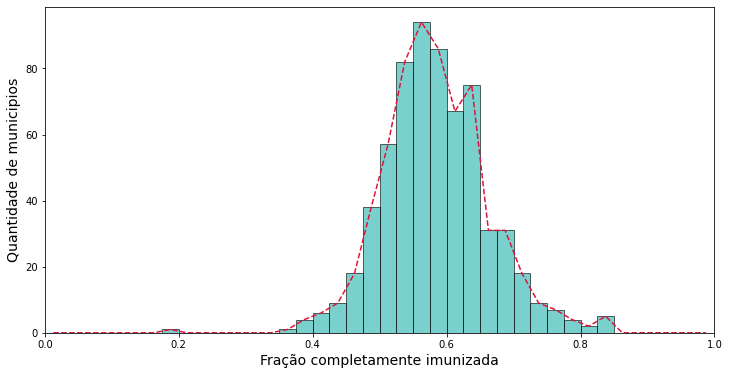

In [ ]:
fig = plt.figure(figsize=(12,6))
n,x,_ = plt.hist(sp['Cobertura vacina completa'], bins=np.linspace(0,1,41), color = 'lightseagreen', edgecolor='black',
                 alpha = 0.6)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n, color = 'crimson', linestyle='dashed')
plt.xlabel('Fração completamente imunizada', fontsize = 14)
plt.ylabel('Quantidade de municipios', fontsize = 14)
plt.xlim(0,1)
fig.patch.set_alpha(1)
for ax in fig.axes:
    ax.patch.set_alpha(1)

In [32]:
sp['Codigo_IBGE'] = sp['Codigo_IBGE'].astype(str)

In [33]:
!wget 'https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/SP_Municipios_2020.zip'

--2021-09-30 23:52:46--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/SP_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/SP_Municipios_2020.zip [following]
--2021-09-30 23:52:46--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/SP_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18734553 (18M) [application/zip]
Saving to: ‘SP_Municipios_2020.zip’

SP_Municipios_2020. 100%[===================>]  17.87M  --.-KB/s 

In [34]:
!unzip SP_Municipios_2020.zip

Archive:  SP_Municipios_2020.zip
   creating: SP_Municipios_2020/
  inflating: SP_Municipios_2020/SP_Municipios_2020.dbf  
  inflating: SP_Municipios_2020/SP_Municipios_2020.prj  
  inflating: SP_Municipios_2020/SP_Municipios_2020.shx  
  inflating: SP_Municipios_2020/SP_Municipios_2020.cpg  
  inflating: SP_Municipios_2020/SP_Municipios_2020.geojson  
  inflating: SP_Municipios_2020/SP_Municipios_2020.shp  


In [35]:
shp_file = gpd.read_file('SP_Municipios_2020/SP_Municipios_2020.shp')

In [36]:
shp_file.to_file('SP_Municipios_2020/SP_Municipios_2020.geojson',
                 driver='GeoJSON')

In [37]:
sp_mun = 'SP_Municipios_2020/SP_Municipios_2020.geojson'

In [38]:
geo_json_data = json.load(open(sp_mun))

In [ ]:
map = folium.Map(width='100%', height='100%', location = [-23.618237, -46.635197], zoom_start = 6)

In [ ]:
map.choropleth(geo_data = geo_json_data, name = 'Cobertura vacinal completa', data = sp, columns = ['Codigo_IBGE', 'Cobertura vacina completa'],
               key_on = 'feature.properties.CD_MUN', fill_color = 'YlGnBu', fill_opacity = 0.9, line_color = 'black',
               line_opacity = 0.6,
               show = False,
               legend_name = f'Cobertura vacinal completa ({date})',
               bins = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
map.save('vaccine_sp_2_dose.html')

In [40]:
df = pd.read_csv('https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/cobertura_vacinal_brasil_por_municipio.csv')

In [42]:
rj = df.loc[df['UF'] == 'RJ'].reset_index(drop=True)

In [ ]:
for i in range(len(rj)):
  municip = ''
  if rj['Município'][i] == 'Varre-Sai':
    municip += 'Varre-Sai'
    rj['Município'][i] = municip
  else:
    n = rj['Município'][i].split(' ')
    for j in range(len(n)):
      if j < len(n)-1:
        if n[j] == 'De' or n[j] == 'Do' or n[j] == 'Da' or n[j] == 'Dos' or n[j] == 'Das':
          name = n[j].lower()
          municip += name + ' '
        else:
          name = n[j][1:].lower()
          municip += n[j][0] + name + ' '
      else:
        name = n[j][1:].lower()
        municip += n[j][0] + name
  rj['Município'][i] = municip

In [44]:
rj = rj.drop([368])

In [41]:
rj_pops = pd.read_csv('https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/Rio_popula%C3%A7oes.csv')

In [45]:
pops = []

for i in range(len(rj)):
  pops.append(rj_pops.loc[rj_pops['Municipio'] == rj['Município'][i]]['Populacao'].values[0])

rj['Populacao'] = pops

In [46]:
rj.head()

,Município,Cód. IBGE,UF,Região,Fabricante,Doses Aplicadas,Dose 1,Dose 2,Populacao
0,Angra dos Reis,330010,RJ,Sudeste,FIOCRUZ/ASTRAZENECA,95803,58145,37625,207044
1,Angra dos Reis,330010,RJ,Sudeste,BUTANTAN/SINOVAC,53301,28756,24545,207044
2,Angra dos Reis,330010,RJ,Sudeste,PFIZER/BIONTECH,45186,39217,5584,207044
3,Angra dos Reis,330010,RJ,Sudeste,JANSSEN,4390,0,0,207044
4,Aperibé,330015,RJ,Sudeste,FIOCRUZ/ASTRAZENECA,7539,4306,3233,11901


In [47]:
rj_final = {}
muns = []
doses = []

for i in range(len(rj_pops)):
  muns.append(rj_pops['Municipio'][i])
  rj_doses = rj.loc[rj['Município'] == rj_pops['Municipio'][i]]
  doses.append(np.sum(rj_doses['Dose 2'].values)+rj_doses.loc[rj_doses['Fabricante'] == 'JANSSEN']['Doses Aplicadas'].values)

In [48]:
rj_final['Municipio'] = muns
rj_final['Imunização completa'] = np.array(doses)[:,0]
rj_final['Populacao'] = rj_pops['Populacao']
rj_final['Cobertura vacinal'] = rj_final['Imunização completa']/rj_final['Populacao']

In [49]:
rj_final = pd.DataFrame(rj_final)

In [50]:
rj_final.loc[rj_final['Municipio'] == 'Rio de Janeiro']

,Municipio,Imunização completa,Populacao,Cobertura vacinal
0,Rio de Janeiro,3637006,6747815,0.53899


In [51]:
rj_final.loc[rj_final['Cobertura vacinal'] == max(rj_final['Cobertura vacinal'])]

,Municipio,Imunização completa,Populacao,Cobertura vacinal
91,Macuco,4327,5623,0.769518


In [52]:
!wget 'https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/RJ_Municipios_2020.zip'

--2021-09-30 23:57:21--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/RJ_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/RJ_Municipios_2020.zip [following]
--2021-09-30 23:57:21--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/RJ_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5305814 (5.1M) [application/zip]
Saving to: ‘RJ_Municipios_2020.zip’

RJ_Municipios_2020. 100%[===================>]   5.06M  --.-KB/s 

In [53]:
!unzip 'RJ_Municipios_2020.zip'

Archive:  RJ_Municipios_2020.zip
  inflating: RJ_Municipios_2020.cpg  
  inflating: RJ_Municipios_2020.dbf  
  inflating: RJ_Municipios_2020.prj  
  inflating: RJ_Municipios_2020.shp  
  inflating: RJ_Municipios_2020.shx  


In [54]:
shp_file = gpd.read_file('RJ_Municipios_2020.shp')

In [55]:
shp_file.to_file('RJ_Municipios_2020.geojson',
                 driver='GeoJSON')

In [56]:
rj_mun = 'RJ_Municipios_2020.geojson'

In [57]:
geo_json_data = json.load(open(rj_mun))

In [ ]:
map = folium.Map(width='100%', height='100%', location = [-22.9035, -43.2096], zoom_start = 7)

In [ ]:
map.choropleth(geo_data = geo_json_data, name = 'Cobertura vacinal completa', data = rj_final, columns = ['Municipio', 'Cobertura vacinal'],
               key_on = 'feature.properties.NM_MUN', fill_color = 'YlGnBu', fill_opacity = 0.9, line_color = 'black',
               line_opacity = 0.6,
               show = False,
               legend_name = 'Cobertura vacinal completa (27-09-2021)',
               bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
map.save('vaccine_rj_2_dose.html')

In [ ]:
np.mean(rj_final['Cobertura vacinal'])

0.3469264680932567

In [ ]:
np.median(rj_final['Cobertura vacinal'])

0.3313303475128257

In [ ]:
np.std(rj_final['Cobertura vacinal'])

0.12049844621476592

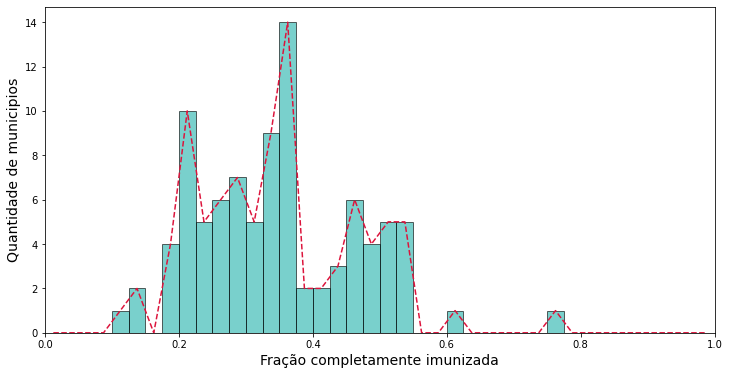

In [ ]:
fig = plt.figure(figsize=(12,6))
n,x,_ = plt.hist(rj_final['Cobertura vacinal'], bins=np.linspace(0,1,41), color = 'lightseagreen', edgecolor='black',
                 alpha = 0.6)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n, color = 'crimson', linestyle='dashed')
plt.xlabel('Fração completamente imunizada', fontsize = 14)
plt.ylabel('Quantidade de municipios', fontsize = 14)
plt.xlim(0,1)
fig.patch.set_alpha(1)
for ax in fig.axes:
    ax.patch.set_alpha(1)